In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from collections import defaultdict

In [9]:
test = defaultdict(list)

test['data'] = np.random.normal(100,25,100)
test['x'] = range(1,len(df['data'])+1)

test = pd.DataFrame(df)

In [10]:
# the Henderson Filter weights

w = [[-0.07343, 0.29371, 0.55944, 0.29371, -0.07343], # middle points
    [0, 0, 0.76467, 0.36713, -0.13181], # starting point
    [0, 0.22776, 0.52522, 0.29121,-0.04419], # second point
    [-0.04419, 0.29121, 0.52522, 0.22776, 0], # T_max
    [-0.13181, 0.36713, 0.76467, 0, 0]] # T_max - 1

In [11]:
# The function
def HendersonFilter (df):
    df['y'] = 0
    for i in range(len(df)):
        if i == 0:
            df.loc[i, 'y'] = np.dot(w[1], df['data'][:len(w[0])])
        elif i == 1:
            df.loc[i, 'y'] = np.dot(w[2], df['data'][:len(w[0])])
        elif i == (len(df)-2):
            df.loc[i, 'y'] = np.dot(w[4], df['data'][-len(w[0]):])
        elif i == (len(df)-1):
            df.loc[i, 'y'] = np.dot(w[3], df['data'][-len(w[0]):])
        else:
            df.loc[i, 'y'] = np.dot(w[0], df['data'][i-(len(w[0])-3):i+(len(w[0])-2)])
    return df

In [12]:
df = HendersonFilter(test)

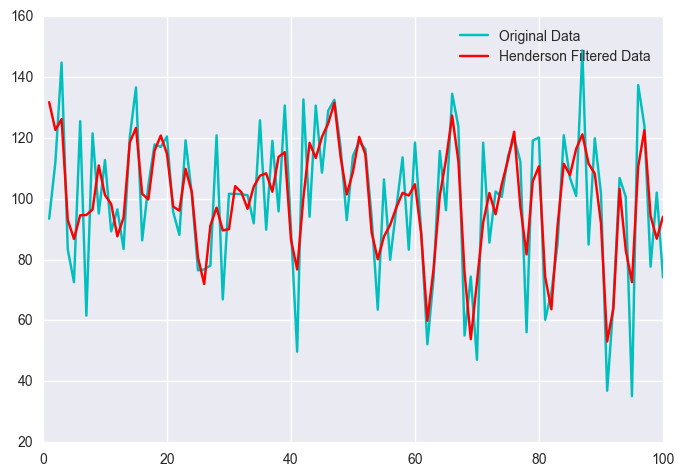

In [13]:
plt.figure()

plt.plot(df['x'], df['data'], c = 'c', label = 'Original Data')
plt.plot(df['x'], df['y'], c = 'r', label = 'Henderson Filtered Data')
plt.legend()
plt.show()
sns.despine()